In [19]:
#pip install git+https://github.com/hiive/mlrose.git#egg=mlrose-hiive

In [20]:
#pip install git+https://github.com/knakamura13/mlrose-ky/#egg=mlrose-ky

In [21]:
import mlrose_hiive as mh

In [22]:
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score

from IPython.core.display import display, HTML # for some notebook formatting.

import logging
import networkx as nx
import matplotlib.pyplot as plt
import string


from ast import literal_eval

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score

# switch off the chatter
logging.basicConfig(level=logging.WARNING)

In [23]:
import pandas as pd

In [24]:
# define a flip flop problem
problem_ffp_1000 = mh.FlipFlopGenerator.generate(seed=0, size = 1000)

In [25]:
# SA runner class
# 1. tune tempeature list
sa_ffp = mh.SARunner(problem=problem_ffp_1000,
              experiment_name='ffp_sa',
              output_directory=None, # note: specify an output directory to have results saved to disk
              seed=0,
              iteration_list=2 ** np.arange(12),
              max_attempts=500,
              temperature_list=[1, 2, 5, 10, 20, 50],
              decay_list=[mh.ExpDecay])

# the two data frames will contain the results
df_run_stats_ffp, df_run_curves_ffp = sa_ffp.run()

In [26]:
df_run_curves_ffp.shape

(12294, 6)

In [27]:
df_run_curves_ffp.head()

,Iteration,Time,Fitness,FEvals,Temperature,max_iters
0,0,0.002371,516.0,0.0,1,2048
1,1,0.009747,516.0,2.0,1,2048
2,2,0.017588,516.0,4.0,1,2048
3,3,0.024838,516.0,6.0,1,2048
4,4,0.027209,516.0,8.0,1,2048


In [28]:
df_run_curves_ffp['Temperature'].value_counts() # what does it say?

Temperature
1     2049
2     2049
5     2049
10    2049
20    2049
50    2049
Name: count, dtype: int64

In [29]:
df_run_curves_ffp.shape

(12294, 6)

In [30]:
# need to check Time and FEvals

In [31]:
df_run_curves_ffp[(df_run_curves_ffp['Fitness'] == df_run_curves_ffp['Fitness'].max())]

,Iteration,Time,Fitness,FEvals,Temperature,max_iters
3992,1943,6.884120,828.0,2890.0,2,2048
3993,1944,6.885396,828.0,2892.0,2,2048
3994,1945,6.886894,828.0,2893.0,2,2048
3995,1946,6.889752,828.0,2895.0,2,2048
3996,1947,6.892235,828.0,2896.0,2,2048
...,...,...,...,...,...,...
4093,2044,7.086898,828.0,3031.0,2,2048
4094,2045,7.088308,828.0,3032.0,2,2048
4095,2046,7.090082,828.0,3033.0,2,2048
4096,2047,7.091724,828.0,3034.0,2,2048


In [32]:
df_run_curves_ffp.dtypes

Iteration        int64
Time           float64
Fitness        float64
FEvals         float64
Temperature     object
max_iters        int64
dtype: object

In [33]:
df_run_curves_ffp['Temperature'] = df_run_curves_ffp['Temperature'].astype(str).astype(float)

In [34]:
df_curves_bestfitness_ffp = df_run_curves_ffp[(df_run_curves_ffp['Fitness'] == df_run_curves_ffp['Fitness'].max())]

In [35]:
df_curves_bestfitness_ffp

,Iteration,Time,Fitness,FEvals,Temperature,max_iters
3992,1943,6.884120,828.0,2890.0,2.0,2048
3993,1944,6.885396,828.0,2892.0,2.0,2048
3994,1945,6.886894,828.0,2893.0,2.0,2048
3995,1946,6.889752,828.0,2895.0,2.0,2048
3996,1947,6.892235,828.0,2896.0,2.0,2048
...,...,...,...,...,...,...
4093,2044,7.086898,828.0,3031.0,2.0,2048
4094,2045,7.088308,828.0,3032.0,2.0,2048
4095,2046,7.090082,828.0,3033.0,2.0,2048
4096,2047,7.091724,828.0,3034.0,2.0,2048


In [36]:
df_curves_bestfitness_ffp.groupby('Temperature').agg({'FEvals': 'min', 'Iteration': 'min', 'Time': 'min'}).reset_index()
# Temp = 2 => only choice

,Temperature,FEvals,Iteration,Time
0,2.0,2890.0,1943,6.88412


In [37]:
# SA runner class
# 2. tune decay, compare with the above results of the same temp
sa_geom_ffp = mh.SARunner(problem=problem_ffp_1000,
              experiment_name='ffp_sa',
              output_directory=None, # note: specify an output directory to have results saved to disk
              seed=0,
              iteration_list=2 ** np.arange(12),
              max_attempts=500,
              temperature_list=[1, 2, 5, 10, 20, 50],
              decay_list=[mh.GeomDecay])

# the two data frames will contain the results
df_run_stats_ffp, df_run_curves_ffp = sa_geom_ffp.run()

In [38]:
df_run_curves_ffp.shape

(12294, 6)

In [39]:
df_run_curves_ffp.head()

,Iteration,Time,Fitness,FEvals,Temperature,max_iters
0,0,0.012573,516.0,0.0,1,2048
1,1,0.057709,516.0,2.0,1,2048
2,2,0.071962,516.0,4.0,1,2048
3,3,0.083293,516.0,6.0,1,2048
4,4,0.085471,516.0,8.0,1,2048


In [40]:
df_run_curves_ffp['Temperature'].value_counts() # what does it say?

Temperature
1     2049
2     2049
5     2049
10    2049
20    2049
50    2049
Name: count, dtype: int64

In [41]:
# need to check Time and FEvals

In [42]:
df_run_curves_ffp[(df_run_curves_ffp['Fitness'] == df_run_curves_ffp['Fitness'].max())]

,Iteration,Time,Fitness,FEvals,Temperature,max_iters
8167,2020,10.974019,824.0,3056.0,10,2048
8168,2021,10.977855,824.0,3057.0,10,2048
8169,2022,10.981147,824.0,3058.0,10,2048
8170,2023,10.984784,824.0,3059.0,10,2048
8171,2024,10.991407,824.0,3061.0,10,2048
8172,2025,10.995200,824.0,3062.0,10,2048
8173,2026,10.998194,824.0,3063.0,10,2048
8174,2027,11.003935,824.0,3064.0,10,2048
8175,2028,11.009679,824.0,3065.0,10,2048
8176,2029,11.013476,824.0,3066.0,10,2048


In [43]:
df_run_curves_ffp.dtypes

Iteration        int64
Time           float64
Fitness        float64
FEvals         float64
Temperature     object
max_iters        int64
dtype: object

In [44]:
df_run_curves_ffp['Temperature'] = df_run_curves_ffp['Temperature'].astype(str).astype(float)

In [45]:
df_curves_bestfitness_ffp = df_run_curves_ffp[(df_run_curves_ffp['Fitness'] == df_run_curves_ffp['Fitness'].max())]

In [46]:
df_curves_bestfitness_ffp

,Iteration,Time,Fitness,FEvals,Temperature,max_iters
8167,2020,10.974019,824.0,3056.0,10.0,2048
8168,2021,10.977855,824.0,3057.0,10.0,2048
8169,2022,10.981147,824.0,3058.0,10.0,2048
8170,2023,10.984784,824.0,3059.0,10.0,2048
8171,2024,10.991407,824.0,3061.0,10.0,2048
8172,2025,10.995200,824.0,3062.0,10.0,2048
8173,2026,10.998194,824.0,3063.0,10.0,2048
8174,2027,11.003935,824.0,3064.0,10.0,2048
8175,2028,11.009679,824.0,3065.0,10.0,2048
8176,2029,11.013476,824.0,3066.0,10.0,2048


In [47]:
df_curves_bestfitness_ffp.groupby('Temperature').agg({'FEvals': 'min', 'Iteration': 'mean', 'Time': 'min'}).reset_index()
# Temp = 2  => less iterations, Fevals and time. Pick temp=2

,Temperature,FEvals,Iteration,Time
0,10.0,3056.0,2034.0,10.974019


In [ ]:
# tentatively, pick exp decay with initial temp=2, as exp took less iteration, FEvals andtime to converge than geometric Decay

In [48]:
df_run_curves_ffp.head()

,Iteration,Time,Fitness,FEvals,Temperature,max_iters
0,0,0.012573,516.0,0.0,1.0,2048
1,1,0.057709,516.0,2.0,1.0,2048
2,2,0.071962,516.0,4.0,1.0,2048
3,3,0.083293,516.0,6.0,1.0,2048
4,4,0.085471,516.0,8.0,1.0,2048


In [54]:
# clean up an existing result table to store the iterative resutls
df_iter_curves_ffp = df_run_curves_ffp.drop(df_run_curves_ffp.index, inplace=False)

In [55]:
# SA runner
# 3. iterate through 10 seeds
for s in range(10):
    sa_ffp = mh.SARunner(problem=problem_ffp_1000,
              experiment_name='ffp_sa_{s}',
              output_directory=None, # note: specify an output directory to have results saved to disk
              seed=s,
              iteration_list=2 ** np.arange(12),
              max_attempts=500,
              temperature_list=[2],
              decay_list=[mh.ExpDecay])

    df_run_stats_ffp_sub, df_run_curves_ffp_sub = sa_ffp.run()
    # append to the result df
    df_iter_curves_ffp = pd.concat([df_iter_curves_ffp, df_run_curves_ffp_sub])

In [87]:
df_iter_curves_ffp.to_csv('sa-flip-flop-ps1000.csv')

In [56]:
df_iter_curves_ffp.shape

(20490, 6)

In [57]:
df_iter_curves_ffp.head()

,Iteration,Time,Fitness,FEvals,Temperature,max_iters
0,0,0.004023,516.0,0.0,2,2048
1,1,0.017763,516.0,2.0,2,2048
2,2,0.030494,516.0,4.0,2,2048
3,3,0.042955,516.0,6.0,2,2048
4,4,0.045205,516.0,8.0,2,2048


In [58]:
df_iter_curves_ffp.Iteration.max()

2048

In [59]:
df_fitness_iter_ffp = df_iter_curves_ffp.groupby('Iteration')\
                                .agg(avg_fitness=('Fitness', 'mean'), var_fitness = ('Fitness', 'var'))\
                                .reset_index()

In [60]:
df_fitness_iter_ffp.shape

(2049, 3)

In [61]:
df_iter_curves_ffp.Fitness.max()

828.0

In [62]:
df_fitness_iter_ffp.avg_fitness.max()

812.9

In [63]:
df_fitness_iter_ffp[df_fitness_iter_ffp.avg_fitness == df_iter_curves_ffp.Fitness.max()]

,Iteration,avg_fitness,var_fitness


In [64]:
df_fitness_iter_ffp[df_fitness_iter_ffp.Iteration ==  1500]

,Iteration,avg_fitness,var_fitness
1500,1500,775.5,222.722222


In [65]:
# converge point
df_fitness_iter_ffp[df_fitness_iter_ffp.avg_fitness >= df_iter_curves_ffp.Fitness.max() -1].Iteration.min()

nan

In [66]:
df_fitness_iter_ffp[df_fitness_iter_ffp.Iteration >= 927].avg_fitness.min(), df_fitness_iter_ffp[df_fitness_iter_ffp.Iteration >= 927].avg_fitness.max()

(721.9, 812.9)

In [67]:
for i in range(927, 2050):
    if df_fitness_iter_ffp[df_fitness_iter_ffp.Iteration >= i].avg_fitness.min() >= 26:
        print(i)
        break

927


In [68]:
df_fitness_iter_ffp['stddev_fitness'] = df_fitness_iter_ffp['var_fitness'].apply(np.sqrt)

In [69]:
df_fitness_iter_ffp.head()

,Iteration,avg_fitness,var_fitness,stddev_fitness
0,0,496.0,233.777778,15.289793
1,1,496.2,219.066667,14.800901
2,2,496.2,231.066667,15.200877
3,3,496.2,241.288889,15.533476
4,4,496.8,253.511111,15.922032


Text(0, 0.5, 'Fitness')

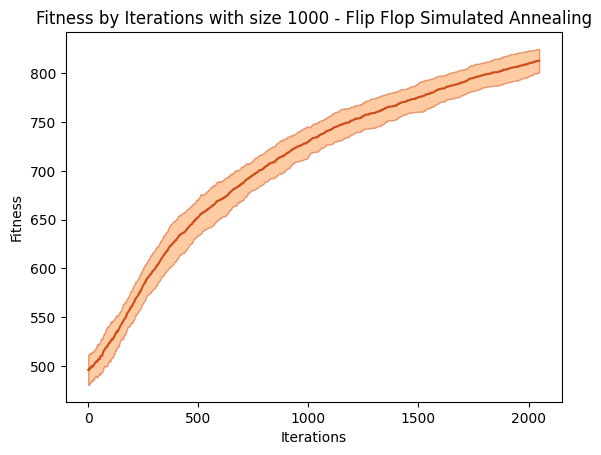

In [70]:
plt.plot(df_fitness_iter_ffp.Iteration, df_fitness_iter_ffp.avg_fitness, 'k', color='#CC4F1B')
plt.fill_between(df_fitness_iter_ffp.Iteration, df_fitness_iter_ffp.avg_fitness - df_fitness_iter_ffp.stddev_fitness\
                 , df_fitness_iter_ffp.avg_fitness + df_fitness_iter_ffp.stddev_fitness\
                 , alpha=0.5, edgecolor='#CC4F1B', facecolor='#FF9848')
plt.title('Fitness by Iterations with size 1000 - Flip Flop Simulated Annealing')
plt.xlabel('Iterations')
plt.ylabel('Fitness')

In [71]:
# Fevals - iteration

In [72]:
df_FEvals_iter_ffp = df_iter_curves_ffp.groupby('Iteration')\
                                .agg(avg_FEvals=('FEvals', 'mean'), var_FEvals = ('FEvals', 'var'))\
                                .reset_index()

In [73]:
df_FEvals_iter_ffp.shape

(2049, 3)

In [74]:
df_FEvals_iter_ffp.head()

,Iteration,avg_FEvals,var_FEvals
0,0,0.0,0.000000
1,1,1.7,0.233333
2,2,3.7,0.233333
3,3,5.6,0.266667
4,4,7.5,0.277778


In [75]:
df_FEvals_iter_ffp['stddev_FEvals'] = df_FEvals_iter_ffp['var_FEvals'].apply(np.sqrt)

In [76]:
df_FEvals_iter_ffp.head()

,Iteration,avg_FEvals,var_FEvals,stddev_FEvals
0,0,0.0,0.000000,0.000000
1,1,1.7,0.233333,0.483046
2,2,3.7,0.233333,0.483046
3,3,5.6,0.266667,0.516398
4,4,7.5,0.277778,0.527046


Text(0, 0.5, 'Cumulative FEvals')

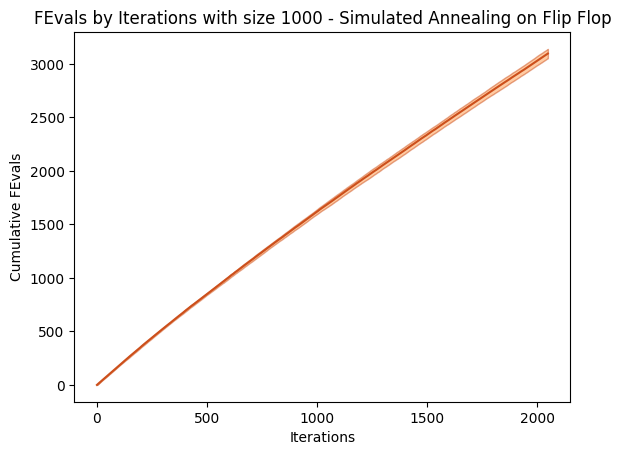

In [77]:
plt.plot(df_FEvals_iter_ffp.Iteration, df_FEvals_iter_ffp.avg_FEvals, 'k', color='#CC4F1B')
plt.fill_between(df_FEvals_iter_ffp.Iteration, df_FEvals_iter_ffp.avg_FEvals - df_FEvals_iter_ffp.stddev_FEvals\
                 , df_FEvals_iter_ffp.avg_FEvals + df_FEvals_iter_ffp.stddev_FEvals\
                 , alpha=0.5, edgecolor='#CC4F1B', facecolor='#FF9848')
plt.title('FEvals by Iterations with size 1000 - Simulated Annealing on Flip Flop')
plt.xlabel('Iterations')
plt.ylabel('Cumulative FEvals')

In [78]:
# fitness - wall clock time

In [79]:
df_iter_curves_ffp.tail()

,Iteration,Time,Fitness,FEvals,Temperature,max_iters
2044,2044,2.896045,790.0,3176.0,2,2048
2045,2045,2.897728,790.0,3178.0,2,2048
2046,2046,2.899457,790.0,3180.0,2,2048
2047,2047,2.900998,790.0,3181.0,2,2048
2048,2048,2.902336,790.0,3182.0,2,2048


In [80]:
df_iter_curves_ffp.head()

,Iteration,Time,Fitness,FEvals,Temperature,max_iters
0,0,0.004023,516.0,0.0,2,2048
1,1,0.017763,516.0,2.0,2,2048
2,2,0.030494,516.0,4.0,2,2048
3,3,0.042955,516.0,6.0,2,2048
4,4,0.045205,516.0,8.0,2,2048


In [81]:
df_time_iter_ffp = df_iter_curves_ffp.groupby('Iteration')\
                                .agg(avg_time=('Time', 'mean'), var_time = ('Time', 'var'))\
                                .reset_index()

In [82]:
df_time_iter_ffp.shape

(2049, 3)

In [83]:
df_time_iter_ffp.head()

,Iteration,avg_time,var_time
0,0,0.001687,9.626417e-07
1,1,0.008953,1.158886e-05
2,2,0.016131,3.751966e-05
3,3,0.022926,8.316668e-05
4,4,0.024505,9.329910e-05


In [84]:
df_time_iter_ffp['stddev_time'] = df_time_iter_ffp['var_time'].apply(np.sqrt)

In [85]:
df_time_iter_ffp.head()

,Iteration,avg_time,var_time,stddev_time
0,0,0.001687,9.626417e-07,0.000981
1,1,0.008953,1.158886e-05,0.003404
2,2,0.016131,3.751966e-05,0.006125
3,3,0.022926,8.316668e-05,0.009120
4,4,0.024505,9.329910e-05,0.009659


Text(0, 0.5, 'Cumulative Time')

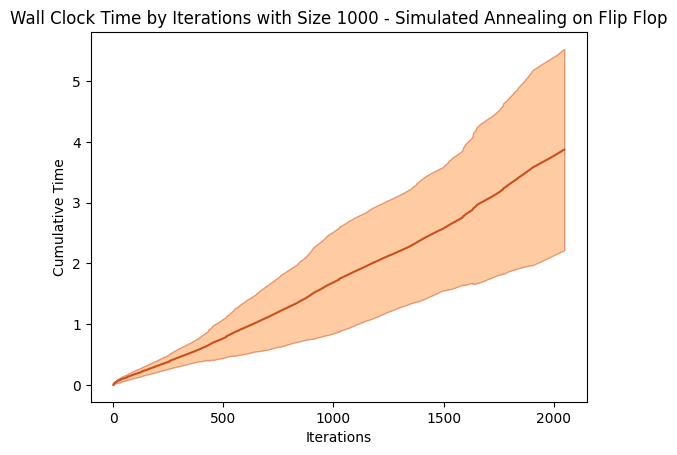

In [86]:
plt.plot(df_time_iter_ffp.Iteration, df_time_iter_ffp.avg_time, 'k', color='#CC4F1B')
plt.fill_between(df_time_iter_ffp.Iteration, df_time_iter_ffp.avg_time - df_time_iter_ffp.stddev_time\
                 , df_time_iter_ffp.avg_time + df_time_iter_ffp.stddev_time\
                 , alpha=0.5, edgecolor='#CC4F1B', facecolor='#FF9848')
plt.title('Wall Clock Time by Iterations with Size 1000 - Simulated Annealing on Flip Flop')
plt.xlabel('Iterations')
plt.ylabel('Cumulative Time')